<a href="https://colab.research.google.com/github/RubenMcCarty/Deep-Learning-RQ/blob/main/CE3_Neural_Networks_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks using Keras

# [MSc. Ruben Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

In this computer exercise we will follow some examples of neural networks implementations based on the use of Keras. The examples proposed in this exercise are very high level and easy to understand. Most of them are based on the original tutorials from Google that you can, alternatively, follow whenever you find some details in this exercise that are not clear. Together with the examples, we propose some questions and simple modifications of the models or examples that the student have to implement and present the results obtained or answer to the questions. These exercises pretend to give a general view of the environment and to give some solid grounds for examples that we have already analyzed in the classroom. Although Keras is a very high level language it implements many variations of well known models and has good flexibility for controlling the architecture of the network, the parameters and the training process. We encourage the student to follow the tutorial in https://www.tensorflow.org/guide/keras to obtain a quick view over the possibilities of Keras.

## A Hello-World example: Handwritten character classification using linear regression with Keras

In this exercise we will develop a linear classifier using Keras that will try to classify input images of handwritten digits. The example is based on MNIST database, a database that is considered as the Hello World database for Machine Learning. The database was originally created by Yan LeCun and the details of its structure are explained at http://yann.lecun.com/exdb/mnist/

Essentially, the database contains 70.000 examples of handwritten digits with its labels. Each image is a 256 gray level image with a 28x28 resolution. In this experiment we will use 60.000 images as the training set and 10.000 images for the testing set.

We can read the data using tensorflow and keras libraries that include this data as examples. 

The following section of code imports tensorflow, keras and other help libraries. If your version is below 1.9.0 you should update your tensorflow library. Then, it reads the training and testing data from MNIST libraries and finally normalizes the data to unity (usually data normalization helps to accelerate training). In this case the normalization is between [0,1] but it also could be centered between [-1, 1].



In [16]:
# Defining libraries

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

from tensorflow.keras import layers
from tensorflow.keras import models

# Other helper libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from MNIST libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# We also normalize the images

train_images = train_images / 255.0 
test_images = test_images / 255.0 

The next portion of code is used to verify the size train_images tensor which is composed by 60000 images with resolution 28x28. It also shows one of the images (index 100) in gray level scale and prints the label of that image.

(60000, 28, 28)
2


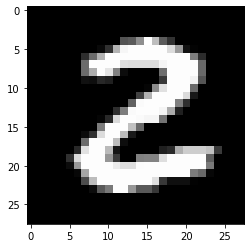

In [17]:
# We can verify the size of the training samples (60000) 
#and the size of the images (28 x 28)

print(train_images.shape)

# Once images have been load we can vverify one of the training examples 
# and its class

plt.figure()
plt.imshow(train_images[25],cmap='gray')

print(train_labels[25])


In [18]:
print(train_images.shape)

(60000, 28, 28)


**Question 1. As an exercise you can verify the size of the test_images and its labels. Write a portion of code printing the number of test images and its resolution and represent the test image with index 500 verifying that the label assigned it is correct.**

MI RESPUESTA SEÑOR PROFESOR ES LA SIGUIENTE ......



(10000, 28, 28)
3


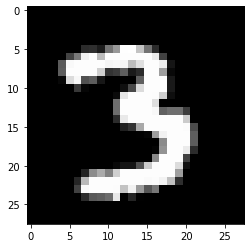

In [19]:
# my answer
print(test_images.shape)

# Once images have been load we can vverify one of the testing examples 
# and its class

plt.figure()
plt.imshow(test_images[500],cmap='gray')

print(test_labels[500])

# MNIST Handwritten Digit Classification Dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

The example below loads the MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


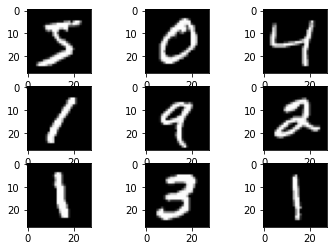

In [20]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Running the example loads the MNIST train and test dataset and prints their shape.

We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

Finally, another usefull section of code to analyse the training database is to represent a tile of 5x5 images with their associated labels. The 25 images are sampled randomly among the training samples using the array rand_sampling. The following figure shows and example of the handwritten digits and their labels that have been selected.

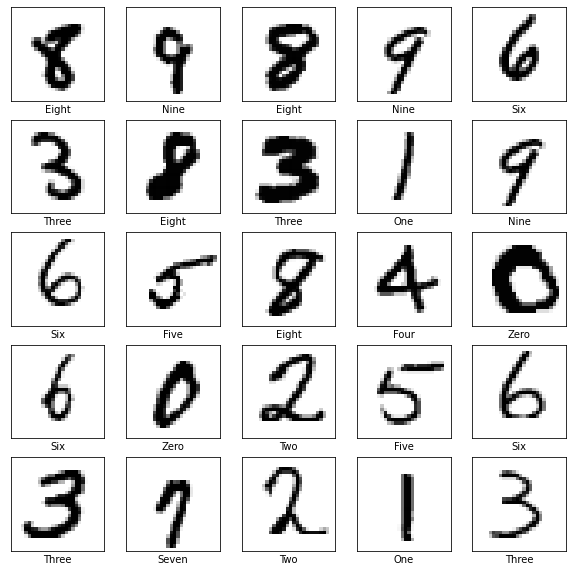

In [21]:
# %%
# Representing some of the training examples with their labels

class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Representing and array of random samples of images and labels
# in the MNIST training database

rand_sampling = np.random.randint(60000,size=25)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_sampling[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[rand_sampling[i]]])
    

## Defining the model and training the network

The definition of a network in Keras is very simple, the idea is to assemble different layers to build models. The most common type of model is a stack of layers. Layers can be sequentially added to the model using the add function. The following section of code defines a first layer of 64 neurons with relu output activations connected to a second layer of the same characteristics. The second layer is finally connected to 10 output neurons that produce a softmax activation. The model is defining a three layer perceptron with 64, 64 and 10 neurons in the different layers.




```
# DO NOT RUN THIS SECTION IS AN EXAMPLE OF NETWORK DEFINITION CODE
# Defining & building a model of linear regression (one layer of 10 neurons)

 
model = models.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
# Adds a densely-connected layer with 128 units to the model:
model.add(layers.Dense(64, activation='relu'))
# Add a softmax layer with 10 output units
model.add(layers.Dense(10,activation='softmax'))'''
```



In [22]:
# Defining & building a model of linear regression (one layer of 10 neurons)

model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax',input_shape=(28*28,)))

The first layer is not a real neuron layer but the definition of the inputs to the networks. The inputs are fully (Densely) connected to 10 neurons with a softmax activation function. 

## Training the Model

Once the model has been designed the training process is usually divided into 2 steps. The first step is Setting-Up the training, using a method called Compile.

The keras.model.compile has three important arguments:

**optimizer**: Defines the training procedure that can be such as AdamOptimizer, RMSPropOptimizer, GradientDescentOptimizer.

**loss**: Defines the function to minimize in the optimization process. It can be mse (mean square error), categorical_crossentropy, binary_crossentropy, etc.

**metrics**: This argument is used to define the metrics that will be used to monitor the training.

In our example, the model is compiled using the following code:


In [23]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, the training is performed using the keras.model.fit method that defines the training examples for the input, the labels of the outputs and the number of epochs that will be used for fitting the model. The code in our example is:

In [24]:
# Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)    

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6052 - accuracy: 0.8486
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.9081
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.9160
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.9198
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9214


Optionally, in the fitting process it is possible to define the batch_size and the validation_data that can be used to test the performance of the network with some examples not used in the training process. 

If we run the example code up to this line we should be able to see how the training is progressing through the different epochs. The results should be similar to the following figure, where we list the time required for executing each epoch, the loss after training and the accuracy, where we see that their improvement with extra training is collapsing in the last epochs. Be careful with these results because the loss and the accuracy are computed for the training set and the system could be overfitting the data. In the next section we will see how to analyze the performance of the network using the test set. However, lets evaluate if learning in the training set could be improved using alternative optimizers such as Gradient Descent.


1
4
3
(60000, 784)
(10000, 784)


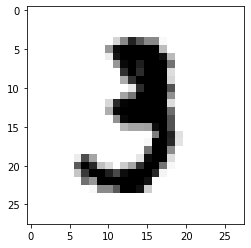

In [25]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

plt.imshow(x_train[9], cmap=plt.cm.binary)
print(y_train[9])

plt.imshow(x_train[10], cmap=plt.cm.binary)
print(y_train[10])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_train.shape)
print(x_test.shape)

**Question 2. Try to change the Optimizer Method to SGD and compare the training evolution of the 5 epochs with the AdamOptimizer. (use help to introduce the learning rate as input parameter in the SGD Optimizer). Answer the following questions**

- Use different learning rates values to find your final selection. What it is your best learning rate?**

- Can you improve the results obtained with AdamOptimizer forcing a learning during more epochs? **

- Repeat the previous 2 questions for the RMSPropOptimizer.**

- Which optimizer is prefered? **

## Evaluating the results

Testing the fitted model with test data may be done using the evaluate method. In this code we executed the model for all the test data samples and labels and obtain the final accuracy. If the final accuracy is close to the accuracy obtained with the training database it means that the network has generalized well and that the results are satisfactory.

In [26]:
# Evaluating the results 

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.2773 - accuracy: 0.9229
Test accuracy: 0.9229000210762024



# answer 2
with optimizer adam



In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)    



Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.9234
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2701 - accuracy: 0.9247
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9263
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.9276
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.9276


 Use different learning rates values to find your final selection. What it is your best learning rate?

How to automatically find optimal learning rates for your neural network architecture
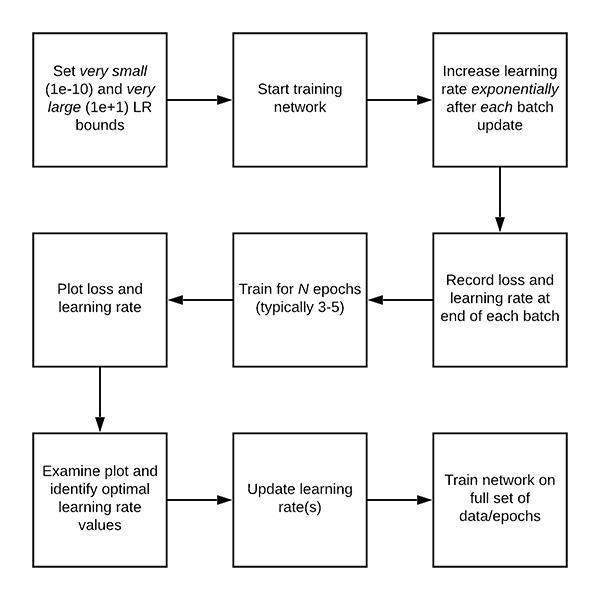

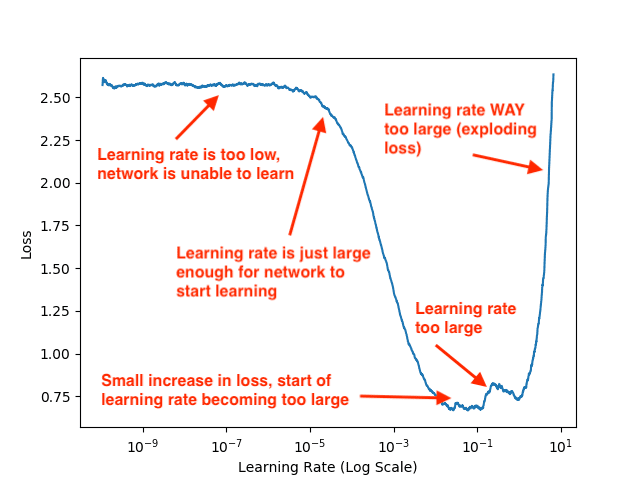

While examining this plot, keep in mind that our learning rate is exponentially increasing after each batch update. After a given batch completes, we increase the learning rate for the next batch.

# How to use the LRFinder
Given an untrained neural network, a loss function and training data, take the following steps:

Start with a very small learning rate (e.g. 1e-10) and exponentially increase the learning rate with each training step. Here’s how to do this in the model function of your network:

In [104]:
# decay_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
#learning_rate = tf.train.exponential_decay(1e-10, global_step=global_step, decay_steps=your_value, decay_rate=your_value)
# So it can be seen in TensorBoard later
#tf.summary.scalar('learning_rate', learning_rate)

# How to determine a good learning rate
You can identify a learning rate by looking at the TensorBoard graph of loss against training step. You want find the section where loss is decreasing fastest, and use the learning rate that was being used at that training step.

With the rmspro optimizer the loss function drops from 0.2752 to 0.2628 and the accuracy increases from 0.9235 to 0.9283.
However, with the adam optimizer, the loss function is better because the error is closer to zero, that is, it drops from 0.2518 to 0.2469, and the accuracy is 0.9322 or more than 93%.
Therefore the adam optimizer is better than rmspro

With epoch =20

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

model.fit(train_images, train_labels, epochs=20, batch_size=128)    


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2583 - accuracy: 0.9287
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.9298
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2540 - accuracy: 0.9303
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9304
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.9311
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2486 - accuracy: 0.9316
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2476 - accuracy: 0.9326
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2465 - accuracy: 0.9318
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2456 - accuracy: 0.9324

with more times or iterations, that is, forward and backpropagation, the accuracy is much better (0.9359), it just takes more time to train.

With optimizer adam, improve the accuracy until 93.75%

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)    

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2383 - accuracy: 0.9347
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2375 - accuracy: 0.9350
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2374 - accuracy: 0.9351
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2367 - accuracy: 0.9346
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.9350


In [31]:
# evaluate the accuracy of test data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9282


[0.26437655091285706, 0.9282000064849854]

In [32]:
%pylab inline
import numpy as np
from tqdm import trange
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


I have built a simple MNIST Classifier using a Convolutional Neural Network in Keras TensorFlow. We have introduced the use of Dropout in Convolutional Neural Network. Keras is library built on top of TensorFlow. 

**Question 3.** 

- What is the test accuracy in the model trained with AdamOptimizer compared with the train accuracy?
- Do you think that the network has generalized well?
- What does happen if instead of AdamOptimizer we use the SGD? 

In [33]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM

## Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

As you can see we improved the accuracy up to 99.21%, using the ADAM optimizer, with 4 layers of neural network in the first 3 layers I used the relu activation function, in the last layer I used the softmax activation function, therefore adam is the best optimizer

Other solution apply optimizer SGD 

In [34]:
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

We now have everything we need; the complete code example for a baseline convolutional neural network model on the MNIST dataset is listed below.

With optimizer SGD, learning_rate=0.01 and momentum=0.9

> 98.558
> 98.758
> 98.533
> 98.817
> 98.708


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


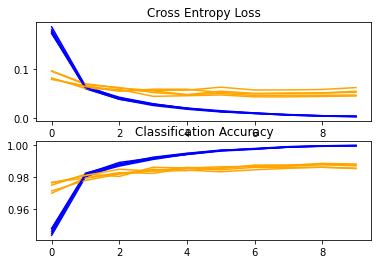

Accuracy: mean=98.675 std=0.111, n=5


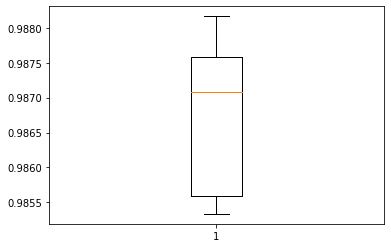

In [35]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

Running the example prints the classification accuracy for each fold of the cross-validation process. This is helpful to get an idea that the model evaluation is progressing.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

We can see two cases where the model achieves perfect skill and one case where it achieved lower than 98% accuracy. These are good results.

If we compare the adam and SGD optimizers, the best optimizer is adam as you can see adam is more accurate


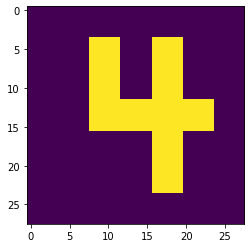

In [36]:
# for fun, can it recognize 4?
m = [[0,0,0,0,0,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,0,1,0,0],
     [0,0,1,1,1,1,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,1,0,0],
     [0,0,0,0,0,0,0]]
# upscale to 28x28
m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
imshow(m.reshape(28,28))

## Making Predictions

Predictions are performed applying the predict method to the set of images to be tested

In [37]:
# Making Predictions

predictions = model.predict(test_images)

The result predictions is a matrix with 1000 rows and 10 columns. Each row represent one of the 1000 testing images and contains the 10 values representing the probability of each character. For example, if we examine the prediction for test sample 25 we obtain the following vector prediction.

In [38]:
print(predictions[25])

[0.9993949  0.00000001 0.00002761 0.00000023 0.00004809 0.0000024
 0.00008152 0.00000182 0.00005874 0.00038469]


## Viewing Predictions

The vector represents the probability of the different digits. In this example, digit zero has a probability of 0.998 while the other digits have very low probabilities. Therefore, the final predicted digit would be, in this example, digit zero. We can verify that image 25 in the test set is a ‘zero’ just printing the label of this image. See the instructions to inspect predictions vector in the #Viewing predictions cell defined in the source code.

Another option to visually evaluate the predictions of our system is representing the character together wit a graphic of the probabilities. The following section of code defines 2 basic plotting functions that are used to produce the results depicted in the Figure.


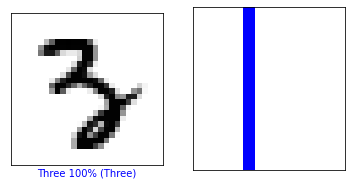

In [39]:
# %% Graphical represntation of a single prediction

# Basic plotting functions definitions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# %% Plotting
# Change variable -i- to select different indices in the test dataset  
i = 87
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)



The final code cell permits to represent and array of random testing samples to evaluate the performance of the algorithm with different types of input samples. The code rearranges the previous graphic in a subplot matrix where the user can define the number of rows and columns.

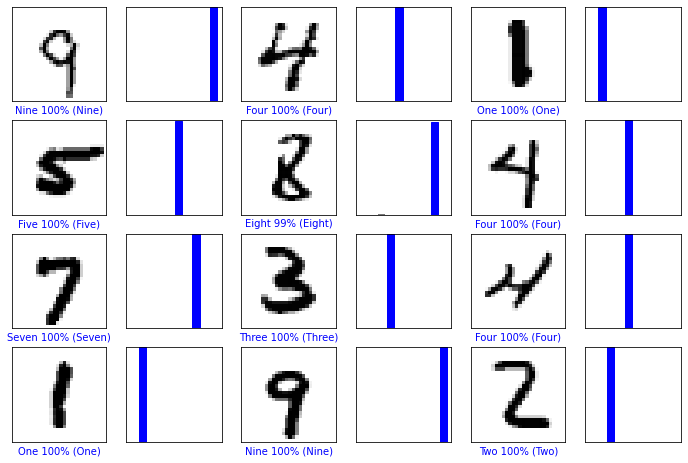

In [40]:
# %% Plotting various samples

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

rnd_testing = np.random.randint(10000,size=12)

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(rnd_testing[i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(rnd_testing[i], predictions, test_labels)




**Question 4.** 

Change the model of your network to a 3 layer fully connected network. The first layer should have 128 neurons, the second layer 64 and the third layer 10 neurons. The last layer uses a softmax activation function but the 1st and 2nd layer can be ‘relu’ or ‘sigmoid’ (2 different models). 

Define the models of the network and copy this part of the code below:

Train both models during 10 epochs and fill-in the following table



Method 
* | Accuracy Training Dataset | Accuracy Testing Set
* adam | 99% |99%|
* Relu + Adam |99%   |
* Relu + Gradient Descent |  98% |
* Sigmoid + Adam |  96% |
* Sigmoid + Gradient Descent |  97% |



# My answer

We get the best accurancy RELU + ADAM

In [41]:
# Import Libraries
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM

## Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                      

RELU + SGD

In [42]:
# Import Libraries
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM

## Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)

model = KM.Model(inputs, outputs)
model.summary()
model.compile(optimizer="SGD",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                      

## Fashion MNIST

It may be interesting to check if the network that we have created may produce good results with other types of databases. MNIST is a very popular database, that was created in the 90s to compare the performance of different machine learning algorithms. Today, it is easy to obtain good results to solve the problem of handwritten digit recognition using neural networks or other machine learning approaches. 

An alternative to MNIST is Fashion MNIST which share the same structure and can be easily integrated in any program working with MNIST. Fashion MNIST also consist in a set of 60.000 training images with a resolution of 28x28 and 256 gray levels and 10.000 testing images. The difference between both databases is that Fashion MNIST includes images of different types of clothing. Instead of the digits number, now the labels are T-shirt/top, Trouser, Pullover, Dress, etc.

As the format of the images and the internal structure of the database is the same, it is easy to adapt our program to test its performance in Fashion MNIST. The only sentences that we have to change are the reading of the dataset and the definition of the classes names associated to the integer levels. That is:

In [43]:
# Defining libraries
from tensorflow.keras import layers
from tensorflow.keras import models

# Other helper libraries

import numpy as np
import matplotlib.pyplot as plt

# Reading data from MNIST libraries

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

# We also normalize the images

train_images = train_images / 255.0 
test_images = test_images / 255.0 


In [44]:
# Naming the different classes with their labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# %% Training the network cell

''' UNCOMMENT THIS SECTION TO IMPLEMENT A LINEAR REGRESSION
# Defining & building a model of linear regression (one layer of 10 neurons)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10,activation='softmax'))

'''
# Defining & building a model of 2 hidden layers and an ouput

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [45]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

model.fit(train_images, train_labels, epochs=20)   

# Evaluating the results 

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Making Predictions

predictions = model.predict(test_images)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4975 - accuracy: 0.8209
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3771 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3517 - accuracy: 0.8741
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8795
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8849
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3261 - accuracy: 0.8860
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3202 - accuracy: 0.8884
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3180 - accuracy: 0.8920
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3127 - accuracy: 0.8920
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.311

As we see in 20 iterations the loss decreases and the accuracy increases.

It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset.

The example below loads the Fashion-MNIST dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


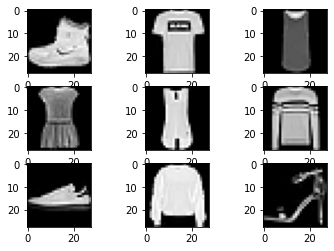

In [46]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Running the example loads the Fashion-MNIST train and test dataset and prints their shape.

We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

We need a function that will drive the test harness.

This involves calling all of the define functions.

In [47]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

We now have everything we need; the complete code example for a baseline convolutional neural network model on the MNIST dataset is listed below.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


> 90.417
> 90.950
> 91.458
> 91.508
> 90.717


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


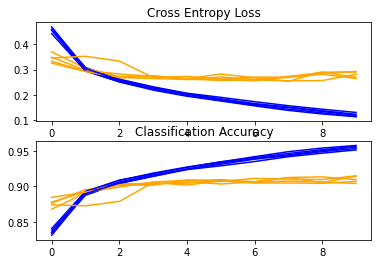

Accuracy: mean=91.010 std=0.422, n=5


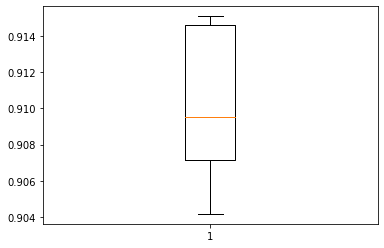

In [48]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
#from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()

We obtain greater than 90% accuracy

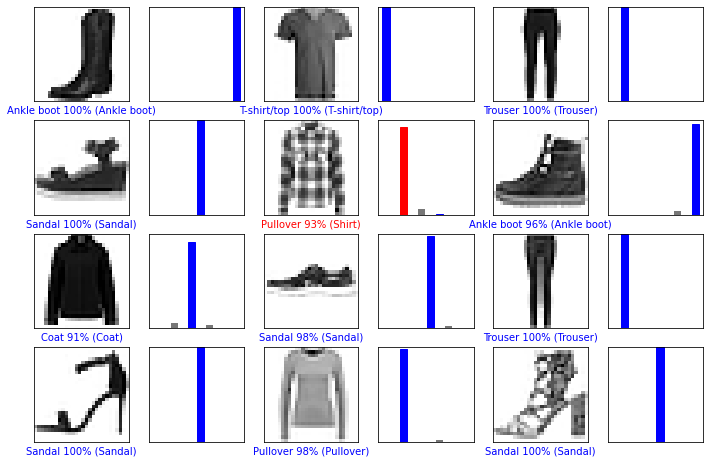

In [49]:

# %% Graphical represntation of a single prediction

# Basic plotting functions definitions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# %% Plotting various samples

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

rnd_testing = np.random.randint(10000,size=12)

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(rnd_testing[i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(rnd_testing[i], predictions, test_labels)




In [50]:
import math

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.8.2


# dataset

In [51]:

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Let’s check how many samples are there in training and testing set as well their size and also the categories.

In [52]:
x_train.shape, x_test.shape, np.unique(y_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

The output shows that we have 60K training images, 10K testing images where each image is of size 28x28 pixels. Similarly, the categories are numbers from 0 to 9. 

In [53]:
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

Let’s plot some images and their labels and check our dataset.

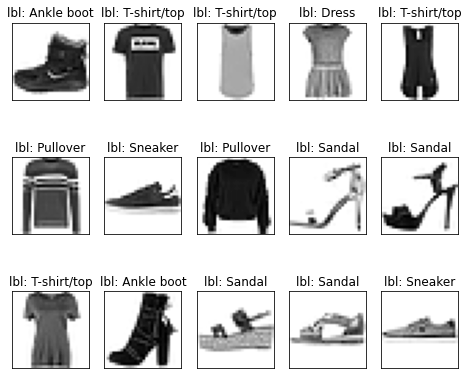

In [54]:
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

# plot first few images
plot(x_train[:15], y_train[:15])  

Before we define our model, we need to scale the pixel values of the images. If we check the min and max pixel values in our dataset using x_train.min(), x_train.max(), we’ll get 0 and 255 respectively. However, it is desirable to scale these values between 0 and 1.

In [55]:

 # scale the values between 0 and 1 for both training and testing set
x_train = x_train / 255.0
x_test = x_test / 255.0

Model Training

Now we can define a simple feed forward neural network using Keras API and train it.

First we add a Flatten layer to our model to convert 2D input to 1D. Remember each input is a 2D matrix with size 28x28. Since feed forward neural networks only work with 1D input, we need to flatten it before. We can also flatten the data outside of the model and remove the Flatten layer from the model. To do this we simply need to use x_train = x_train.reshape(60000, -1). It will give you a np array of size 60000 x 768 which can be directly fed to a Dense layer.

In [56]:
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.5331 - accuracy: 0.8134 - val_loss: 0.4286 - val_accuracy: 0.8481
Epoch 2/10
800/800 [==============================] - 4s 4ms/step - loss: 0.3964 - accuracy: 0.8599 - val_loss: 0.3802 - val_accuracy: 0.8652
Epoch 3/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3542 - accuracy: 0.8730 - val_loss: 0.3686 - val_accuracy: 0.8640
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3304 - accuracy: 0.8793 - val_loss: 0.3764 - val_accuracy: 0.8687
Epoch 5/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3097 - accuracy: 0.8854 - val_loss: 0.3514 - val_accuracy: 0.8720
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 0.2929 - accuracy: 0.8930 - val_loss: 0.3345 - val_accuracy: 0.8824
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: 0.2782 - accuracy: 0.8972 - val_loss: 0.3218 - val_accuracy: 0.8801
Epoch 

The model was able to achieve an accuracy of 87% in the validation set. Let’s check its performance on the test set.

In [57]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

313/313 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8803
Accuracy = 88.03 %


prediction

If you want the full probability distribution of the labels then you can use model.predict function to get the outputs. It will give you a matrix of size n_samples x n_labels. Basically, each row in the output matrix contain probability of the image belogning to one of 10 categories. To get the category in which the image belongs to, you simply find out in which column the maximum value is present.So, you’ll need to do model.predict(x_test).argsort()[:,-1] or model.predict(x_test).argmax(axis=1) or you can make your life easier and just use model.predict_classes function

In [60]:
probs = model.predict(x_test)
print(probs.argmax(axis=1))

# another way to do the same thing
print(model.predict(x_test).argsort()[:,-1])

# another way to do the same thing
#print(model.predict_classes[0])
print(test_labels[0])

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
9


interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…

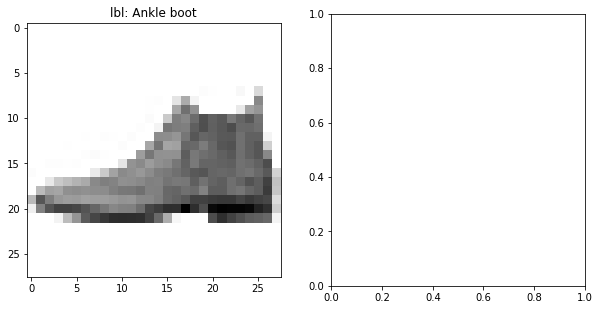

In [68]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(x_test)-1, description="Image index")

@interact(i=img_idx_slider)

def visualize_prediction(i=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(x_test[i], cmap=plt.cm.binary)
    ax1.set_title(f"lbl: {class_names[y_test[i]]}")
    ax1.set_xlabel(f"pred: {class_names[preds[i]]}")


    ax2.bar(x=[class_names[i] for i in range(10)], height=probs[i]*100)
    plt.xticks(rotation=90)

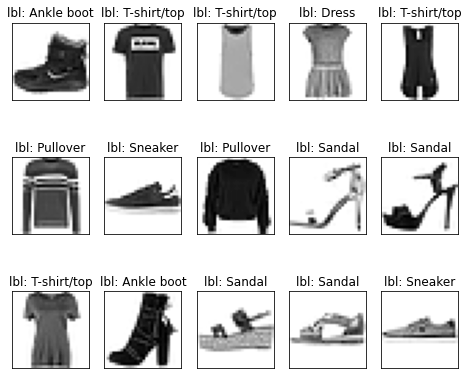

In [69]:
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

# plot first few images
plot(x_train[:15], y_train[:15])   

**Question 5.**

In this part of the exercise we will try to find a configuration of a 3 layer fully connected perceptron offering the better achievable accuracy for the test dataset. To do that we propose to select the activation functions and the learning method that produced best results in Question 5 and try to find a suitable architecture (number of neurons per layer) to maximize the accuracy in the test set. Possibly, as the number of parameters in fully connected networks increases you also should train your network during more epochs. Fill in the following table:

NEURONS LAYER 1| data
---|---
NEURONS LAYER 2| enter value
NEURONS LAYER 3|10
ACTIVATIONS LAYERS 1+2|enter value
ACCURACY TRAINING SET|enter value
ACCURACY TEST SET|enter value


In [70]:
def relu(x):
  return np.maximum(0, x)

def reluPrime(x):
  return x > 0

In [71]:
def linear(x):
    return x

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

In [72]:
# Mean Square Error -> usada para regresión (con activación lineal)
def mse(y, y_hat):
    return np.mean((y_hat - y.reshape(y_hat.shape))**2)

# Binary Cross Entropy -> usada para clasificación binaria (con sigmoid)
def bce(y, y_hat):
    return - np.mean(y.reshape(y_hat.shape)*np.log(y_hat) - (1 - y.reshape(y_hat.shape))*np.log(1 - y_hat))

# Cross Entropy (aplica softmax + cross entropy de manera estable) -> usada para clasificación multiclase
def crossentropy(y, y_hat):
    logits = y_hat[np.arange(len(y_hat)),y]
    entropy = - logits + np.log(np.sum(np.exp(y_hat),axis=-1))
    return entropy.mean()

In [73]:
def grad_mse(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

def grad_bce(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)

def grad_crossentropy(y, y_hat):
    answers = np.zeros_like(y_hat)
    answers[np.arange(len(y_hat)),y] = 1    
    return (- answers + softmax(y_hat)) / y_hat.shape[0]

#MLP Implementation

Now that we have defined the different activation and loss functions that we need, we are going to implement our two-layer MLP capable of carrying out both regression and classification tasks. In the same way that we already did with the Perceptron, we will define a base class that will serve to implement the particular classes for each case.

In [74]:
# clase base MLP 

class MLP():
  def __init__(self, D_in, H, D_out, loss, grad_loss, activation):
    # pesos de la capa 1
    self.w1, self.b1 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(D_in+H)),
                                  size=(D_in, H)), np.zeros(H)
    # pesos de la capa 2
    self.w2, self.b2 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(H+D_out)),
                                  size=(H, D_out)), np.zeros(D_out)
    self.ws = []
    # función de pérdida y derivada
    self.loss = loss
    self.grad_loss = grad_loss
    # función de activación
    self.activation = activation

  def __call__(self, x):
    # salida de la capa 1
    self.h_pre = np.dot(x, self.w1) + self.b1
    self.h = relu(self.h_pre)
    # salida del MLP
    y_hat = np.dot(self.h, self.w2) + self.b2 
    return self.activation(y_hat)
    
  def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
    batch_size = len(X) if batch_size == None else batch_size
    batches = len(X) // batch_size
    l = []
    for e in range(1,epochs+1):     
        # Mini-Batch Gradient Descent
        _l = []
        for b in range(batches):
            # batch de datos
            x = X[b*batch_size:(b+1)*batch_size]
            y = Y[b*batch_size:(b+1)*batch_size] 
            # salida del perceptrón
            y_pred = self(x) 
            # función de pérdida
            loss = self.loss(y, y_pred)
            _l.append(loss)        
            # Backprop 
            dldy = self.grad_loss(y, y_pred) 
            grad_w2 = np.dot(self.h.T, dldy)
            grad_b2 = dldy.mean(axis=0)
            dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)      
            grad_w1 = np.dot(x.T, dldh)
            grad_b1 = dldh.mean(axis=0)
            # Update (GD)
            self.w1 = self.w1 - lr * grad_w1
            self.b1 = self.b1 - lr * grad_b1
            self.w2 = self.w2 - lr * grad_w2
            self.b2 = self.b2 - lr * grad_b2
        l.append(np.mean(_l))
        # guardamos pesos intermedios para visualización
        self.ws.append((
            self.w1.copy(),
            self.b1.copy(),
            self.w2.copy(),
            self.b2.copy()
        ))
        if verbose and not e % log_each:
            print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')

  def predict(self, ws, x):
    w1, b1, w2, b2 = ws
    h = relu(np.dot(x, w1) + b1)
    y_hat = np.dot(h, w2) + b2
    return self.activation(y_hat)

In [75]:
# MLP para regresión
class MLPRegression(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, mse, grad_mse, linear)

# MLP para clasificación binaria
class MLPBinaryClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, bce, grad_bce, sigmoid)

# MLP para clasificación multiclase
class MLPClassification(MLP):
    def __init__(self, D_in, H, D_out):
        super().__init__(D_in, H, D_out, crossentropy, grad_crossentropy, linear)

Regression
First of all, we are going to replicate the results obtained in the previous post to verify that our MLP model is still working well.

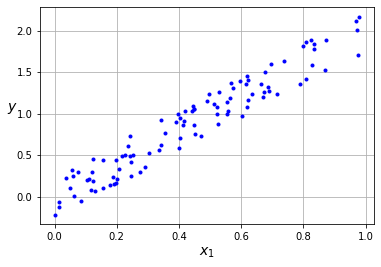

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
X = x.reshape(-1, 1)
y = 2*x + (np.random.rand(100)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [77]:
model = MLPRegression(D_in=1, H=3, D_out=1)
epochs, lr = 50, 0.01
model.fit(x.reshape(len(x),1), y, epochs, lr, log_each=10)

Epoch: 10/50, Loss: 1.18719
Epoch: 20/50, Loss: 1.04780
Epoch: 30/50, Loss: 0.96638
Epoch: 40/50, Loss: 0.90424
Epoch: 50/50, Loss: 0.85292


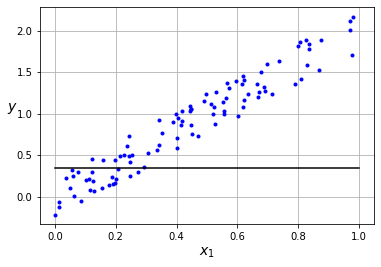

In [78]:
x_new = np.linspace(0, 1, 100)
x_new = x_new.reshape(len(x_new),1)
y_pred = model(x_new)
    
plt.plot(x, y, "b.")
plt.plot(x_new, y_pred, "-k")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

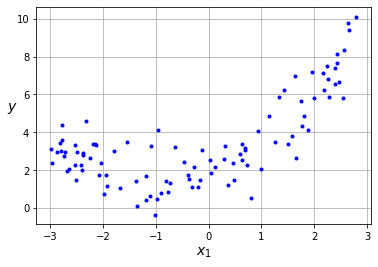

In [79]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [80]:
model = MLPRegression(D_in=1, H=3, D_out=1)
epochs, lr = 50, 0.01
model.fit(x.reshape(len(x),1), y, epochs, lr, batch_size=1, log_each=10)

Epoch: 10/50, Loss: 1.38951
Epoch: 20/50, Loss: 1.29958
Epoch: 30/50, Loss: 1.26823
Epoch: 40/50, Loss: 1.25233
Epoch: 50/50, Loss: 1.24272


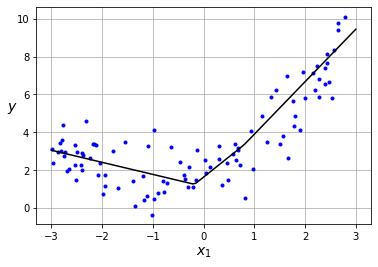

In [81]:
x_new = np.linspace(-3, 3, 100)
x_new = x_new.reshape(len(x_new),1)
y_pred = model(x_new)
    
plt.plot(x, y, "b.")
plt.plot(x_new, y_pred, "-k")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")

### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. Note how we first use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In this next block, you'll define the fully connected layers of this simple work.

# Force of Multi-Layer Perceptron

In [82]:
# load all the required libraries

import numpy as np                                    # package for computing
from sklearn.model_selection import train_test_split  # split dataset
import keras                                          # import keras with tensorflow as backend
from keras.datasets import mnist                      # import mnist dataset from keras 
from keras.models import Model, Sequential            # sequential and functional api keras 
from keras.layers import Dense, Input                 # dense and input layer for constructing mlp

import matplotlib.pyplot as plt             # matplotlib library for plotting

# display plots inline (in notebook itself)

%matplotlib inline    

MNIST Dataset
The MNIST dataset of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples each of size 28 x 28 pixels. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Here is one example of number 5 from dataset


In [83]:
# load mnist data

# the data, split between train and validation sets
(train_x, train_y), (test_x, test_y) = mnist.load_data()

#orginally shape (60000, 28, 28) for train and (10000, 28, 28) for test
#but as we will be using fully connected layers we will flatten
#the images into 1d array of 784 values instead of (28 x 28) 2d array
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

# As image is grayscale it has values from [0-255] which we will visualize below
# convert dtype to float32 and scale the data from [0-255] to [0-1]
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

print('Training samples and shape:', train_x.shape[0], train_x.shape)
print('Test samples and shape:', test_x.shape[0], test_x.shape)

Training samples and shape: 60000 (60000, 784)
Test samples and shape: 10000 (10000, 784)


What happened?

Since training/test sets were made of website images, our algorithm did not generalize well to the actual distribution you care about: mobile phone pictures.

Before the modern era of big data, it was a common rule in machine learning to use a random 70% / 30% split to form training and test sets. This practice can work, but it’s a bad idea in more and more applications where the training distribution (website images in our example above) is different from the distribution you ultimately care about (mobile phone images).

In [84]:
# we will split val into --> 20% val set and 80% test set 
# stratify ensures the distribution of classes is same in both the sets

val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.8, stratify=test_y)

print ('Validation samples and shape', val_x.shape[0], val_x.shape)
print ('Test samples and shape', test_x.shape[0], test_x.shape)

Validation samples and shape 2000 (2000, 784)
Test samples and shape 8000 (8000, 784)


Visualization of data
Enough talk, show me the data!

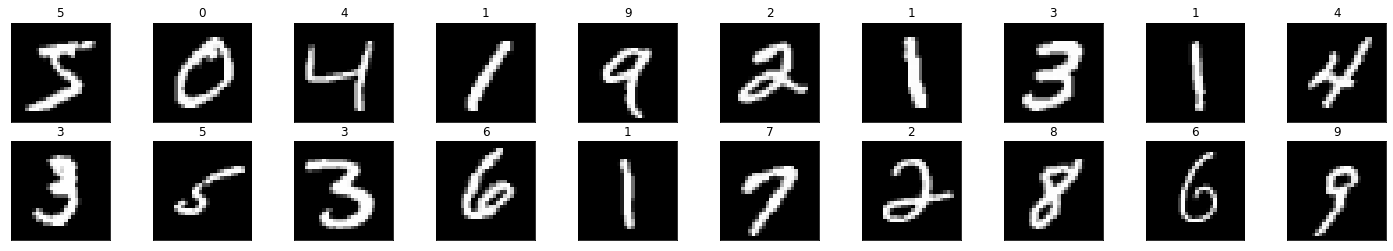

In [85]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx].reshape(28, 28), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(train_y[idx]))

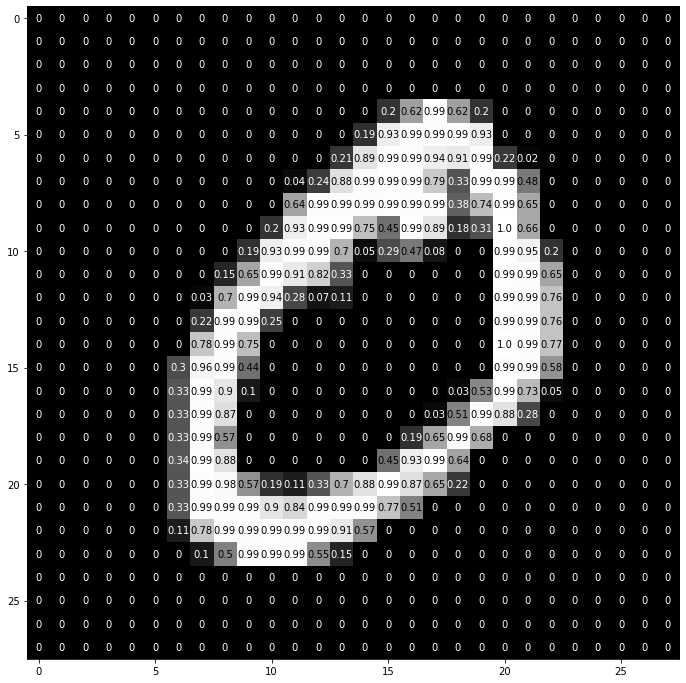

In [86]:
img = train_x[1].reshape(28, 28)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

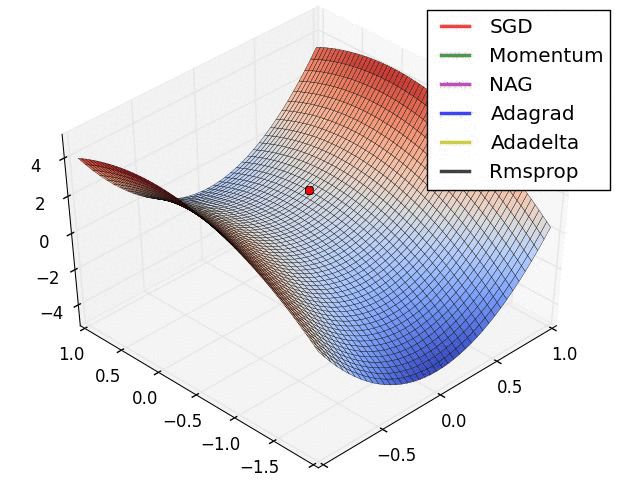

## Convolutional Neural Networks in Keras

One interesting strategy is to extend the models and include Convolutional Neural Network (CNN) architectures that usually will improve the predictions. Keras gives a lot of flexibility to define different models combining convolutional layers, pooling layers, dropouts, regularizations, etc. In the following section of code, we can see and example of a CNN architecture applied to our MNIST problem.

In this case, we are defining a network with a first 2D convolutional layer with a convolutional kernel of 5x5 and 16 feature map, with stride 1, without padding and an activation of relu. This layer is connected to another layer with 16 features, 3x3 kernel and the outputs are passed through a MaxPool layer with a 2x2 stride. It is easy to see that the construction of the code is almost straightforward and that any structure can easily be defined after sequencing the layers.  


For working with the system, the structure of the data has to be redefined to specifically indicate the number of channels in the input. With that purpose, train and test images are reshaped to have a dimension of (60000,28,28,1) and (10000,28,28,1). The last component indicates that the images are in gray level and that the input has a single channel. If images were in color the last component should be 3.
The fitting process (training) and the prediction have to work with the extended versions of the datasets.


In [87]:
train_images_ext = train_images.reshape(train_images.shape[0],28,28,1)
test_images_ext = test_images.reshape(test_images.shape[0],28,28,1)

#We also normilize the images
train_images_ext = train_images_ext / 255.0 
test_images_ext = test_images_ext / 255.0 
test_images_ext.shape

(10000, 28, 28, 1)

In [88]:
# Defining a model with 2D convolutional neural networks

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), 
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.Conv2D(64,(3,3), 
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3), 
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3), 
                              strides=(1,1),padding='valid',
                              data_format='channels_last', activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dropout(0.10))
model.add(layers.Dense(10,activation='softmax'))
#     
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
train_labels = train_labels.reshape(train_labels.shape[0],1)

model.fit(train_images_ext, train_labels, batch_size = 128, epochs=20)    

# Evaluating the results 

test_loss, test_acc = model.evaluate(test_images_ext, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 1.4736 - accuracy: 0.4498
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7332 - accuracy: 0.7236
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5894 - accuracy: 0.7782
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4944 - accuracy: 0.8153
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.4307 - accuracy: 0.8411
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3921 - accuracy: 0.8557
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3632 - accuracy: 0.8662
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3440 - accuracy: 0.8743
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3274 - accuracy: 0.8790
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3148 - accuracy: 0.88

**Question 6**

- What is the final accuracy that you have obtained with the training set?
- What is the final accuracy that you have obtained with the testing set?


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [89]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [90]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

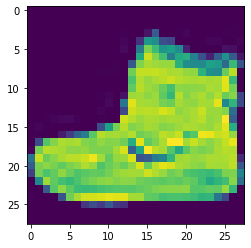

In [91]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [92]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [93]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [94]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4930 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3737 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8913


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [95]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8762


[0.3453752100467682, 0.8762000203132629]

#Limitations of the previous DNN
As we know how to classify fashion items using the MNIST dataset, this gave you a pretty accurate classifier, but there was an obvious constraint: the images were 28x28, gray scale and the item was centered in the image.
Now let's see some limitations

For example here are a couple of the images in Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

The DNN that we created simply learned from the raw pixels what made up a sweater, and what made up a boot in this context. But consider how it might classify this image?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 greyscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot is.

That's where Convolutions are very powerful. A convolution is a filter that passes over an image, processing it, and extracting features that show a commonolatity in the image. In this notebook we'll see how they work, but processing an image to see if you can extract features from it!



Generating convolutions is very simple -- you simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

So, for example, consider this:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)

In this case a 3x3 Convolution is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbor values, and multiplying them out by the values specified in the filter, and making the new pixel value the final amount.

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

Let's start by importing some python libraries.

In [96]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Next, we can use the pyplot library to draw the image so we know what it looks like.

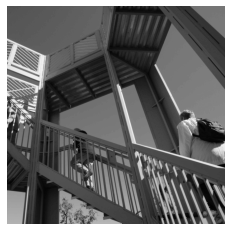

In [97]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [98]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array.

In [99]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [100]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

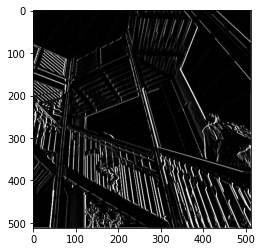

In [101]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

![Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)


## Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the features that are detected as present. 

There are a number of different types of pooling, but for this lab we'll use one called MAX pooling. 

 The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

This code will show a (2, 2) pooling.Run it to see the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!


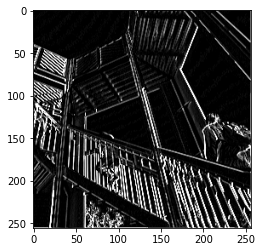

In [102]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    

Thank you so much Profesor Frances
